In [ ]:
import numpy as np 
import pandas as pd 

In [2]:
df = pd.read_csv('/kaggle/input/banking-dataset-marketing-targets/train.csv', sep=';', low_memory=True)
df_test = pd.read_csv('/kaggle/input/banking-dataset-marketing-targets/test.csv', sep=';')
df.shape

(45211, 17)

In [3]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Checking each categorical class in countplot

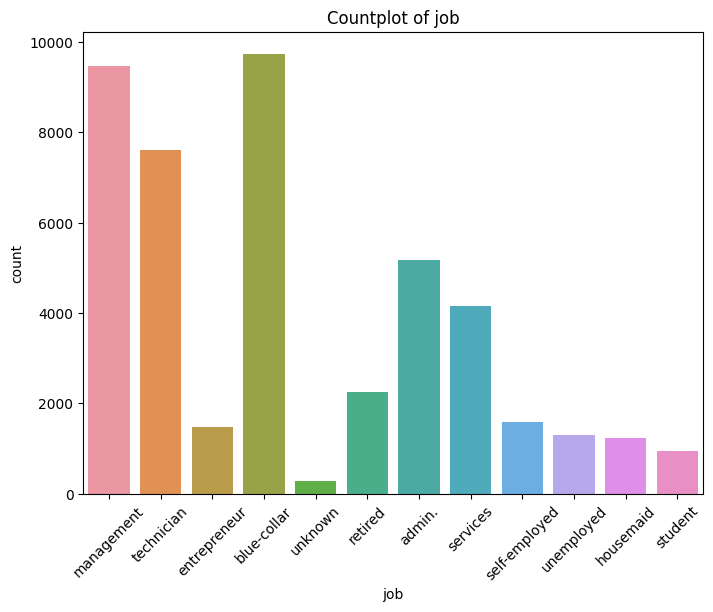

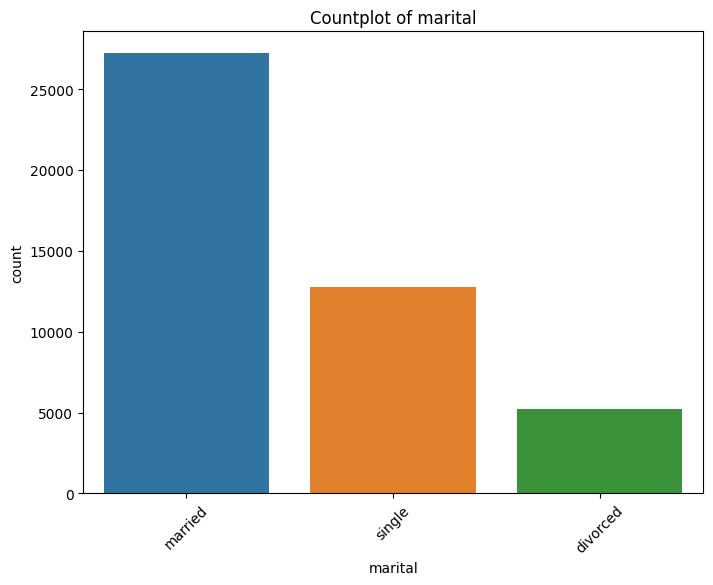

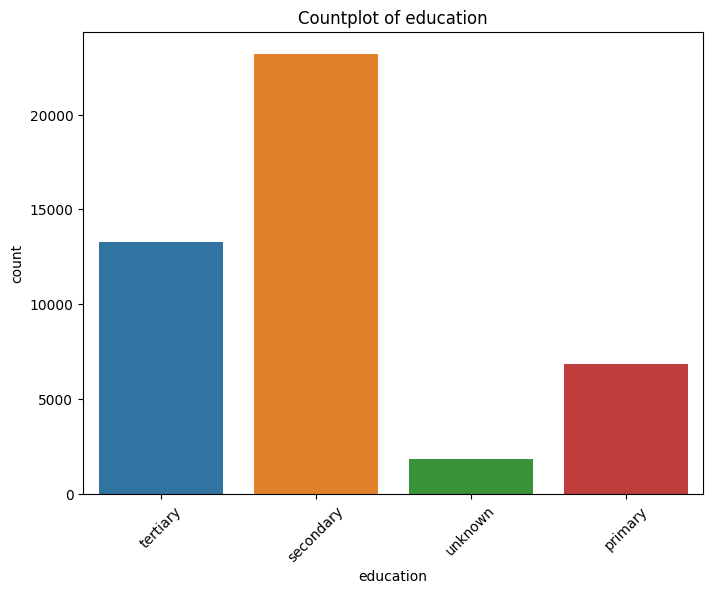

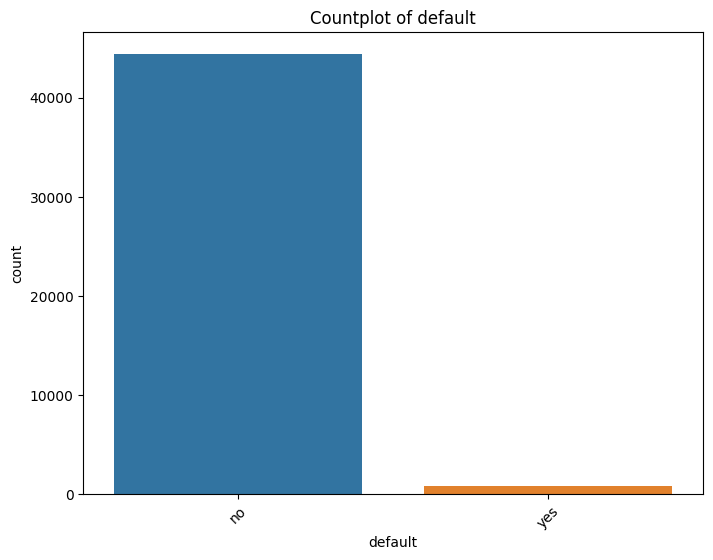

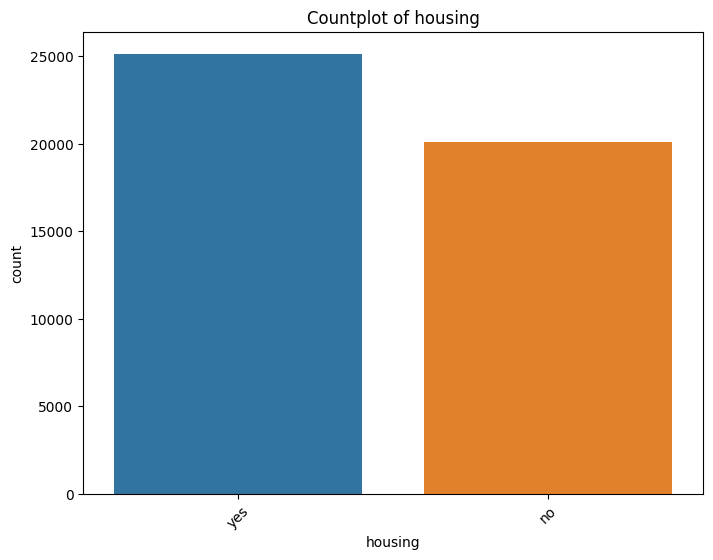

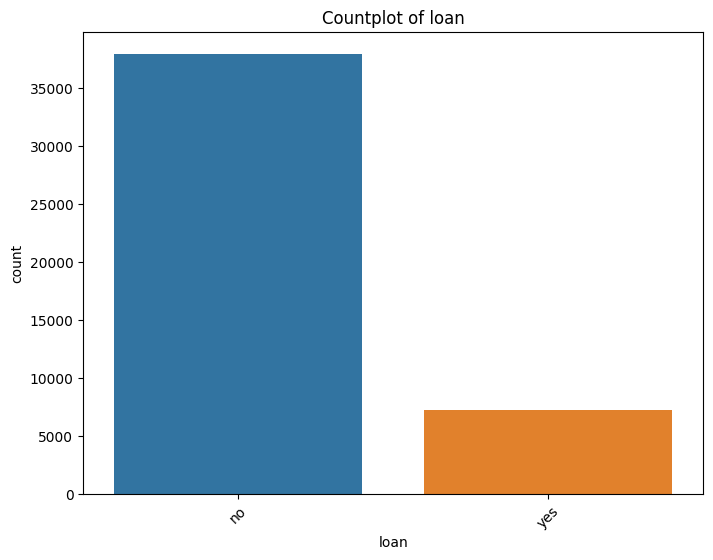

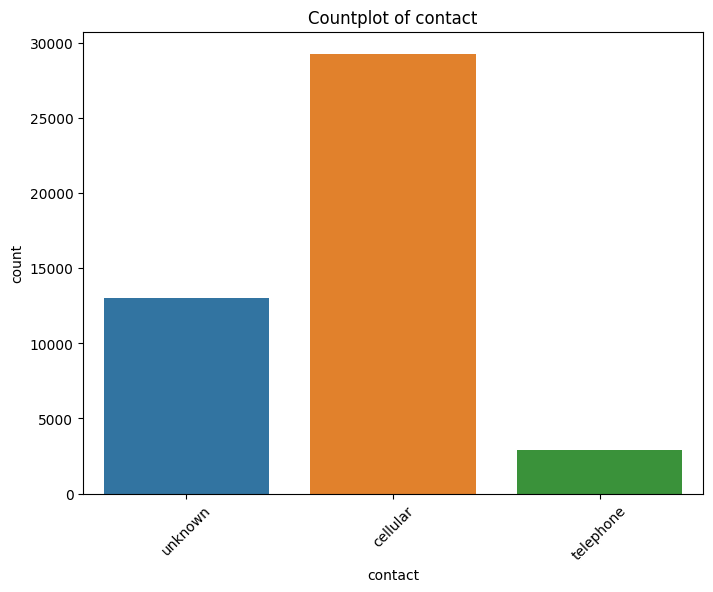

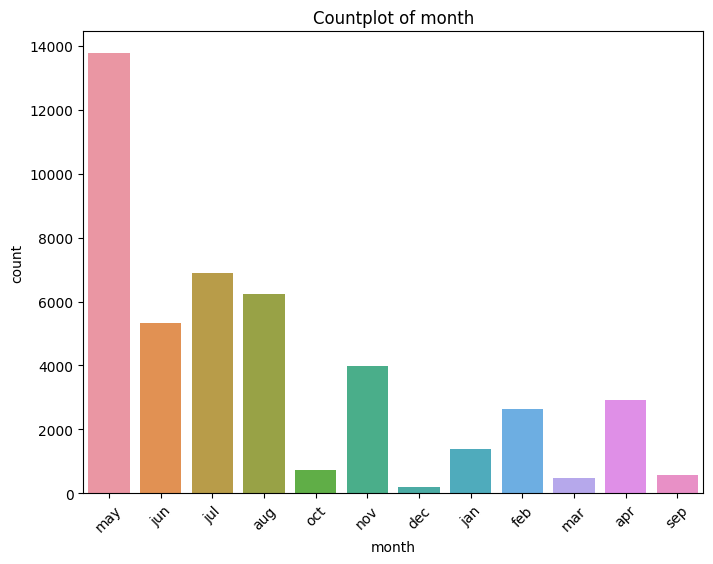

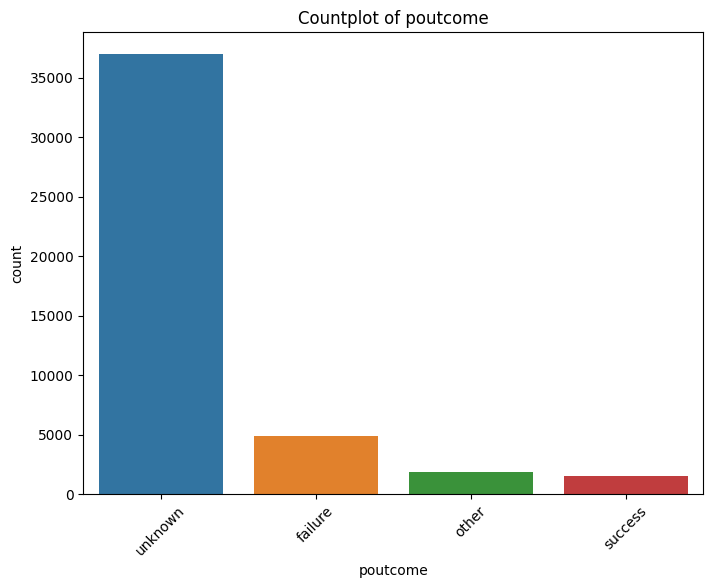

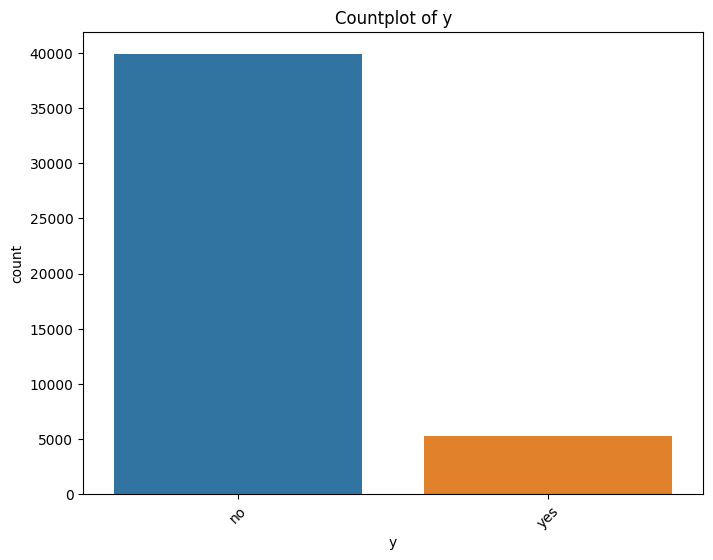

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a list of categorical columns you want to plot
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

# Create subplots for each categorical column
for column in categorical_columns:
    plt.figure(figsize=(8, 6))  # Adjust figure size if needed
    sns.countplot(data=df, x=column)
    plt.title(f'Countplot of {column}')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability (optional)
    plt.show()


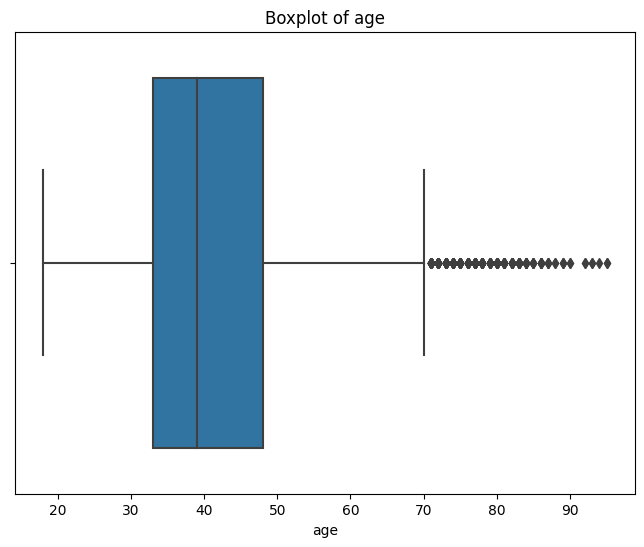

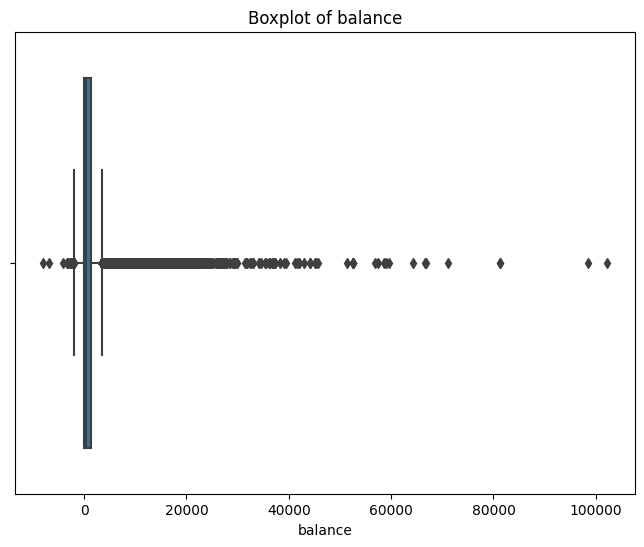

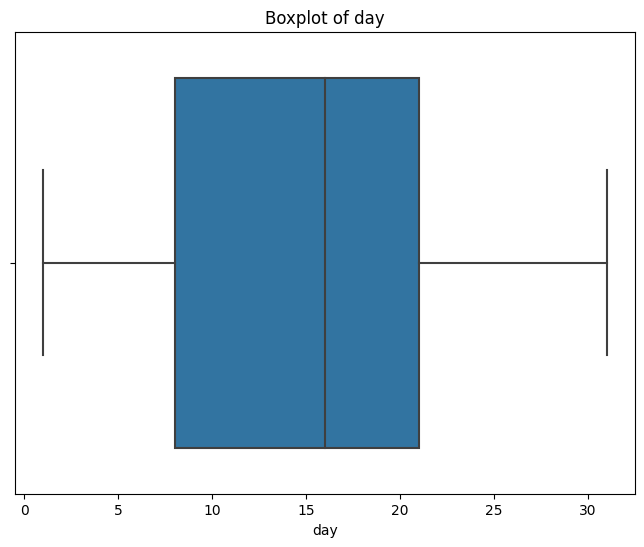

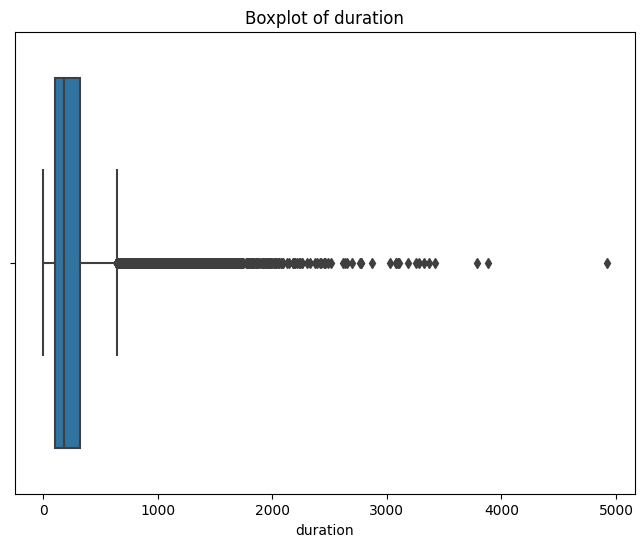

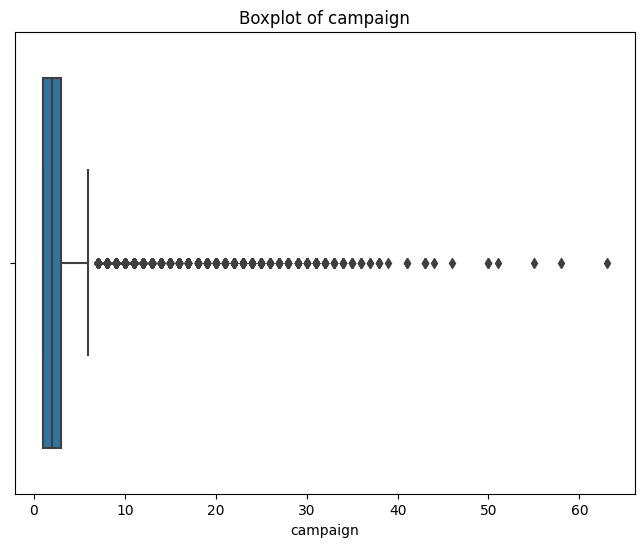

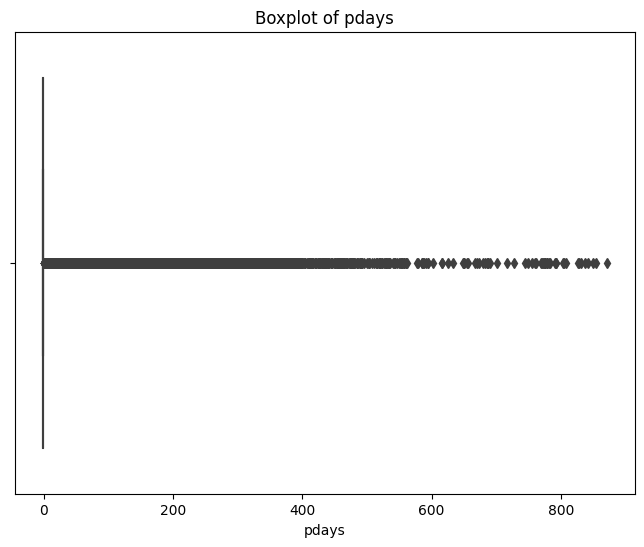

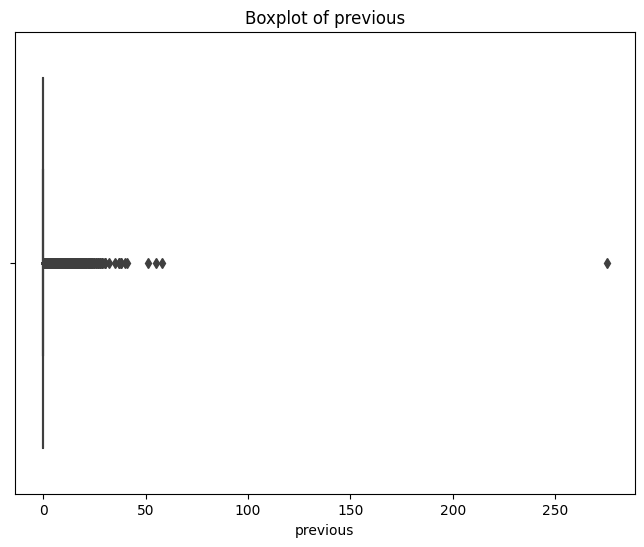

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Loop through numerical columns and create boxplots to identify outliers
for column in df.select_dtypes(include=['number']).columns:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=df[column])
  plt.title(f'Boxplot of {column}')
  plt.show()


#### Encode column to numerical

In [7]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Loop through categorical columns and encode them
for column in categorical_columns:
  #if column != 'y':
    df[column] = le.fit_transform(df[column])

# Display the updated DataFrame with encoded columns
display(df.head())


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [8]:
print(df['y'].value_counts())
print(df.shape)

y
0    39922
1     5289
Name: count, dtype: int64
(45211, 17)


##### We see in above, the target feature is have imbalance extreme, which means we need to balance the class to get better result in our model.

In [9]:
from imblearn.over_sampling import SMOTE

# Separate features (X) and target (y)
X = df.drop('y', axis=1)
y = df['y']

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new balanced DataFrame
balanced_df = pd.concat([X_resampled, y_resampled], axis=1)

# Check the class distribution in the balanced dataset
print(balanced_df['y'].value_counts())

# Now you can use balanced_df for your model training


y
0    39922
1    39922
Name: count, dtype: int64


In [10]:
df = balanced_df.copy()
df.shape

(79844, 17)

#### Scale features except target to become more distributed each other

In [11]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

for column in df.select_dtypes(include=['number']).columns:
  if column != 'y':
    df[column] = ss.fit_transform(df[[column]])

display(df.head())

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1.564115,-0.103288,-0.139051,1.204012,-0.104531,0.187401,1.268406,-0.326509,2.058772,-1.318733,0.935405,-0.334711,-0.525284,-0.48828,-0.33576,0.549514,0
1,0.283510,1.565381,1.528972,-0.225498,-0.104531,-0.478838,1.268406,-0.326509,2.058772,-1.318733,0.935405,-0.652480,-0.525284,-0.48828,-0.33576,0.549514,0
2,-0.722679,-0.770755,-0.139051,-0.225498,-0.104531,-0.487347,1.268406,3.062701,2.058772,-1.318733,0.935405,-0.869141,-0.525284,-0.48828,-0.33576,0.549514,0
3,0.557926,-1.104488,-0.139051,2.633522,-0.104531,-0.013353,1.268406,-0.326509,2.058772,-1.318733,0.935405,-0.822920,-0.525284,-0.48828,-0.33576,0.549514,0
4,-0.722679,2.232848,1.528972,2.633522,-0.104531,-0.487662,-0.788391,-0.326509,2.058772,-1.318733,0.935405,-0.516706,-0.525284,-0.48828,-0.33576,0.549514,0


In [12]:
df.duplicated().sum()

948

In [13]:
# Since there is a duplicate in the data, we need to drop that
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

0


#### Ok, Now.Before we train the model, we need to use feature selection, because the feature in the data is too much.

In [14]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

# Assuming X and y are your features and target variable
X = df.drop('y', axis=1)
y = df['y']
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Define the estimators
estimators = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier()
]

# Loop through the estimators and perform feature selection
for estimator in estimators:
  print(f"Performing feature selection with {type(estimator).__name__}")

  # Create RFE object with the estimator and desired number of features to select
  rfe = RFE(estimator=estimator, n_features_to_select=8)  # You can adjust the number of features

  # Fit RFE to the training data
  rfe.fit(X_train, y_train)

  # Get the selected features
  selected_features = X_train.columns[rfe.support_]

  # Print the selected features
  print("Selected Features:", selected_features)
  print("-" * 100)

Performing feature selection with DecisionTreeClassifier
Selected Features: Index(['age', 'balance', 'housing', 'contact', 'day', 'month', 'duration',
       'poutcome'],
      dtype='object')
----------------------------------------------------------------------------------------------------
Performing feature selection with RandomForestClassifier
Selected Features: Index(['age', 'balance', 'housing', 'contact', 'day', 'month', 'duration',
       'pdays'],
      dtype='object')
----------------------------------------------------------------------------------------------------
Performing feature selection with GradientBoostingClassifier
Selected Features: Index(['job', 'housing', 'loan', 'contact', 'month', 'duration', 'campaign',
       'poutcome'],
      dtype='object')
----------------------------------------------------------------------------------------------------
Performing feature selection with XGBClassifier
Selected Features: Index(['education', 'housing', 'loan', 'contact'

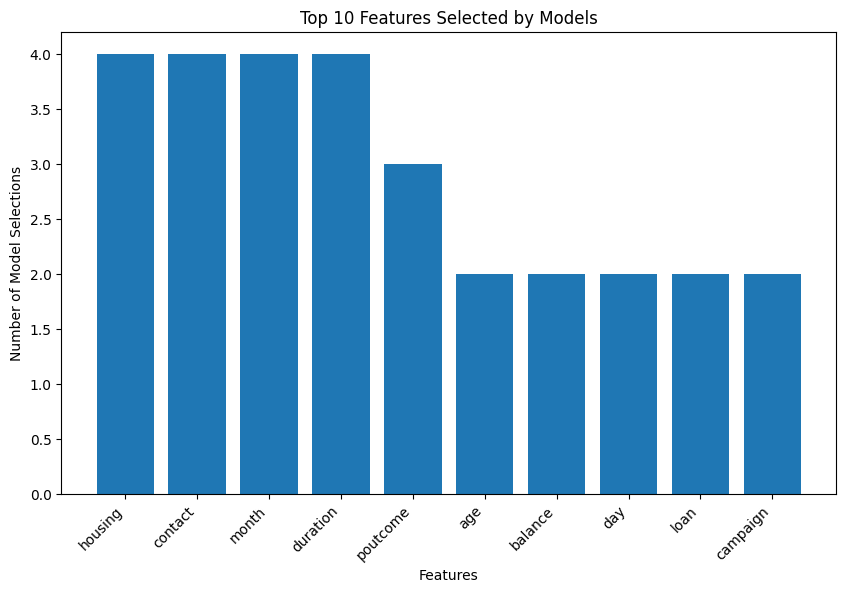

Overall Top 8 Features: ['housing', 'contact', 'month', 'duration', 'poutcome', 'age', 'balance', 'day', 'loan', 'campaign']


In [15]:
# Assuming you have a list of selected features for each model
# Create a dictionary to store the feature counts
feature_counts = {}
for estimator in estimators:
  rfe = RFE(estimator=estimator, n_features_to_select=8)
  rfe.fit(X_train, y_train)
  selected_features = X_train.columns[rfe.support_]
  for feature in selected_features:
    if feature in feature_counts:
      feature_counts[feature] += 1
    else:
      feature_counts[feature] = 1

# Sort features by count in descending order
sorted_features = sorted(feature_counts.items(), key=lambda item: item[1], reverse=True)

# Get the top 10 features
top_8_features = [feature for feature, count in sorted_features[:10]]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(len(top_8_features)), [count for feature, count in sorted_features[:10]])
plt.xticks(range(len(top_8_features)), top_8_features, rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Number of Model Selections')
plt.title('Top 10 Features Selected by Models')
plt.show()

# Print the overall top 8 features
print("Overall Top 8 Features:", top_8_features)

In [16]:
# Create a new DataFrame with only the top 10 features and the target variable
df_top_10 = df[top_8_features + ['y']]

# Now df_top_10 contains only the selected features and the target variable
print(df_top_10.head())

# Separate features (X) and target (y) from the new DataFrame
X = df_top_10.drop('y', axis=1)
y = df_top_10['y']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


    housing   contact     month  duration  poutcome       age   balance  \
0  1.268406  2.058772  0.935405 -0.334711  0.549514  1.564115  0.187401   
1  1.268406  2.058772  0.935405 -0.652480  0.549514  0.283510 -0.478838   
2  1.268406  2.058772  0.935405 -0.869141  0.549514 -0.722679 -0.487347   
3  1.268406  2.058772  0.935405 -0.822920  0.549514  0.557926 -0.013353   
4 -0.788391  2.058772  0.935405 -0.516706  0.549514 -0.722679 -0.487662   

        day      loan  campaign  y  
0 -1.318733 -0.326509 -0.525284  0  
1 -1.318733 -0.326509 -0.525284  0  
2 -1.318733  3.062701 -0.525284  0  
3 -1.318733 -0.326509 -0.525284  0  
4 -1.318733 -0.326509 -0.525284  0  


In [17]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# train models

for estimator in estimators:
  estimator.fit(X_train, y_train)
  y_pred = estimator.predict(X_test)
  print(f"Model: {type(estimator).__name__}")
  print(f'Accuracy Score : {accuracy_score(y_test,y_pred):.2f}')
  print(f'Precision Score : {precision_score(y_test,y_pred):.2f}')
  print(f'Recall Score : {recall_score(y_test,y_pred):.2f}')
  print(f'F1_Score : {f1_score(y_test,y_pred):.2f}')
  print("-" * 50)
  print(classification_report(y_test, y_pred))
  print("-" * 50)
  print(f'This model : {type(estimator).__name__} done train!')
  #print(confusion_matrix(y_test, y_pred))
  #print("-" * 50)

Model: DecisionTreeClassifier
Accuracy Score : 0.89
Precision Score : 0.88
Recall Score : 0.90
F1_Score : 0.89
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      8023
           1       0.88      0.90      0.89      7757

    accuracy                           0.89     15780
   macro avg       0.89      0.89      0.89     15780
weighted avg       0.89      0.89      0.89     15780

--------------------------------------------------
This model : DecisionTreeClassifier done train!
Model: RandomForestClassifier
Accuracy Score : 0.92
Precision Score : 0.90
Recall Score : 0.95
F1_Score : 0.92
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.90      0.92      8023
           1       0.90      0.95      0.92      7757

    accuracy                           0.92     15780
   macro avg       0.92      0.9

In [18]:
# prompt: how about using randomizedsearchcv for searching best parameters on my models

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define parameter distributions for each model
param_distributions = {
    'DecisionTreeClassifier': {
        'criterion': ['gini', 'entropy'],
        'max_depth': randint(2, 10),
        'min_samples_split': randint(2, 20),
        'min_samples_leaf': randint(1, 10)
    },
    'RandomForestClassifier': {
        'n_estimators': randint(50, 200),
        'max_depth': randint(2, 10),
        'min_samples_split': randint(2, 20),
        'min_samples_leaf': randint(1, 10),
        'bootstrap': [True, False]
    },
    'GradientBoostingClassifier': {
        'n_estimators': randint(50, 200),
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': randint(2, 10),
        'min_samples_split': randint(2, 20),
        'min_samples_leaf': randint(1, 10)
    },
    'XGBClassifier': {
        'n_estimators': randint(50, 200),
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': randint(2, 10),
        'min_child_weight': randint(1, 10),
        'gamma': [0, 0.1, 0.2]
    }
}

# Perform RandomizedSearchCV for each model
for estimator in estimators:
  model_name = type(estimator).__name__
  print(f"Performing RandomizedSearchCV for {model_name}")

  # Create RandomizedSearchCV object
  random_search = RandomizedSearchCV(
      estimator=estimator,
      param_distributions=param_distributions.get(model_name, {}),
      n_iter=20,  # Number of parameter settings that are sampled
      cv=5,
      scoring='accuracy',  # You can choose other scoring metrics
      random_state=42,
      n_jobs=-1  # Use all available CPU cores
  )

  # Fit RandomizedSearchCV to the training data
  random_search.fit(X_train, y_train)

  # Print the best parameters and score
  print("Best Parameters:", random_search.best_params_)
  print("Best Score:", random_search.best_score_)
  print("-" * 50)


  # Train the model with the best parameters
  best_estimator = random_search.best_estimator_
  best_estimator.fit(X_train, y_train)

  # Make predictions on the test set
  y_pred = best_estimator.predict(X_test)

  # Evaluate the model
  print(f"Model: {model_name} with best parameters")
  print(f'Accuracy Score : {accuracy_score(y_test,y_pred):.2f}')
  print(f'Precision Score : {precision_score(y_test,y_pred):.2f}')
  print(f'Recall Score : {recall_score(y_test,y_pred):.2f}')
  print(f'F1_Score : {f1_score(y_test,y_pred):.2f}')
  print("-" * 50)
  print(classification_report(y_test, y_pred))
  print("-" * 50)
  print(f'This model : {model_name} with best parameters done train!')


Performing RandomizedSearchCV for DecisionTreeClassifier
Best Parameters: {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 3, 'min_samples_split': 3}
Best Score: 0.8789530600638763
--------------------------------------------------
Model: DecisionTreeClassifier with best parameters
Accuracy Score : 0.87
Precision Score : 0.85
Recall Score : 0.90
F1_Score : 0.87
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.85      0.87      8023
           1       0.85      0.90      0.87      7757

    accuracy                           0.87     15780
   macro avg       0.87      0.87      0.87     15780
weighted avg       0.87      0.87      0.87     15780

--------------------------------------------------
This model : DecisionTreeClassifier with best parameters done train!
Performing RandomizedSearchCV for RandomForestClassifier
Best Parameters: {'bootstrap': True, 'max_depth': 9, 'min_samples_lea